by : hanan zuheer mohamad abuzainab

## Introduction
The dataset comprises detailed specifications and performance metrics for a variety of car models, including attributes such as make, model, type, origin, drivetrain, MSRP, invoice price, engine size, cylinders, horsepower, fuel efficiency (MPG), weight, wheelbase, and length. This diverse set of variables provides a comprehensive view of each car, allowing for in-depth analysis and comparison across different car types and origins.

| **Variable**  | **Description**                                                                                                  |
|---------------|------------------------------------------------------------------------------------------------------------------|
| `Make`        | The manufacturer or brand of the car (e.g., Toyota, Ford, BMW).                                                  |
| `Model`       | The specific name or designation of the car model (e.g., Camry, Mustang, 3 Series).                             |
| `Type`        | The category or classification of the car (e.g., Sedan, SUV, Truck).                                             |
| `Origin`      | The country or region where the car is manufactured (e.g., USA, Japan, Germany).                                 |
| `DriveTrain`  | The type of drivetrain configuration in the car (e.g., FWD - Front-Wheel Drive, RWD - Rear-Wheel Drive, AWD - All-Wheel Drive). |
| `MSRP`        | The Manufacturer's Suggested Retail Price, which is the price recommended by the manufacturer (in USD).          |
| `Invoice`     | The price that the dealer pays to the manufacturer for the car (in USD).                                         |
| `EngineSize`  | The size of the car's engine, typically measured in liters.                                                      |
| `Cylinders`   | The number of cylinders in the car's engine, which affects the engine's power and efficiency.                    |
| `Horsepower`  | The amount of power produced by the car's engine, measured in horsepower (hp).                                   |
| `MPG_City`    | The car's fuel efficiency in miles per gallon (MPG) when driving in the city.                                    |
| `MPG_Highway` | The car's fuel efficiency in miles per gallon (MPG) when driving on the highway.                                 |
| `Weight`      | The weight of the car, typically measured in pounds (lbs).                                                       |
| `Wheelbase`   | The distance between the front and rear axles of the car, typically measured in inches.                          |
| `Length`      | The total length of the car, typically measured in inches.                                                       |


### 1. gathering data

In [70]:
import pandas as pd
import numpy as np

In [71]:
cars=pd.read_csv(r"C:\Users\ToP NeT\Desktop\data analyst\datasets\cars.csv")

In [72]:
print(f"data size is : {cars.shape}")
cars.sample(10)

data size is : (428, 15)


Make                             Model    Type  Origin DriveTrain  \
379      Toyota                    Corolla CE 4dr   Sedan    Asia      Front   
32          BMW                          330i 4dr   Sedan  Europe       Rear   
383      Toyota                     Echo 2dr auto   Sedan    Asia      Front   
111       Dodge                   Intrepid ES 4dr   Sedan     USA      Front   
22         Audi  TT 1.8 Quattro 2dr (convertible)  Sports  Europe        All   
242       Mazda                      Mazda3 s 4dr   Sedan    Asia      Front   
394      Toyota                Sienna XLE Limited   Sedan    Asia      Front   
16         Audi          A6 2.7 Turbo Quattro 4dr   Sedan  Europe        All   
408  Volkswagen                    Passat GLS 4dr   Sedan  Europe      Front   
224       Lexus                        GS 300 4dr   Sedan    Asia       Rear   

         MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
379  $14,085   $13,065          1.8        4.0         130        32   
32   $35,495   $32,525          3.0        6.0         225        20   
383  $11,560   $10,896          1.5        4.0         108        33   
111  $24,885   $23,058          3.5        6.0         232        18   
22   $37,390   $33,891          1.8        4.0         225        20   
242  $17,200   $15,922          2.3        4.0         160        25   
394  $28,800   $25,690          3.3        6.0         230        19   
16   $42,840   $38,840          2.7        6.0         250        18   
408  $23,955   $21,898          1.8        4.0         170        22   
224  $41,010   $36,196          3.0        6.0         220        18   

     MPG_Highway  Weight  Wheelbase  Length  
379           40    2502        102     178  
32            30    3285        107     176  
383           39    2085         93     163  
111           27    3487        113     204  
22            28    2921         96     159  
242           31    2762        104     179  
394           27    4165        119     200  
16            25    3836        109     192  
408           31    3241        106     185  
224           25    3649        110     189

### 2. assessing and cleaning data

#### issue: completness


In [73]:
# number of null values in the dataset
for x in cars.columns:
 print(f"{x} variable: {cars[x].isnull().sum()}")

Make variable: 0
Model variable: 0
Type variable: 0
Origin variable: 0
DriveTrain variable: 0
MSRP variable: 0
Invoice variable: 0
EngineSize variable: 0
Cylinders variable: 2
Horsepower variable: 0
MPG_City variable: 0
MPG_Highway variable: 0
Weight variable: 0
Wheelbase variable: 0
Length variable: 0


>Cylinders has 2 null values

#### clean

In [74]:
#fill the null values with mean
cars["Cylinders"].fillna(cars["Cylinders"].mean(), inplace=True)

In [75]:
#check again
print(f"""number of null values in the Cylinders variable is : {cars["Cylinders"].isnull().sum()}""")


number of null values in the Cylinders variable is : 0


#### issue: validity

* #### check the range

In [76]:
cars.describe()

EngineSize   Cylinders  Horsepower    MPG_City  MPG_Highway  \
count  428.000000  428.000000  428.000000  428.000000   428.000000   
mean     3.196729    5.807512  215.885514   20.060748    26.843458   
std      1.108595    1.554789   71.836032    5.238218     5.741201   
min      1.300000    3.000000   73.000000   10.000000    12.000000   
25%      2.375000    4.000000  165.000000   17.000000    24.000000   
50%      3.000000    6.000000  210.000000   19.000000    26.000000   
75%      3.900000    6.000000  255.000000   21.250000    29.000000   
max      8.300000   12.000000  500.000000   60.000000    66.000000   

            Weight   Wheelbase      Length  
count   428.000000  428.000000  428.000000  
mean   3577.953271  108.154206  186.362150  
std     758.983215    8.311813   14.357991  
min    1850.000000   89.000000  143.000000  
25%    3104.000000  103.000000  178.000000  
50%    3474.500000  107.000000  187.000000  
75%    3977.750000  112.000000  194.000000  
max    7190.000000  144.000000  238.000000

In [77]:
cars["Make"].value_counts()

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: count, dtype: int64

there is no outlires in the data according to min and max 

#### check the datatypes

In [78]:
cars.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

>MSRP/Invoice therse coulmn should be float instead of string 

#### clean

In [79]:
#removing unncessacry characters
cars["MSRP"]=cars['MSRP'].str.replace("$","")
cars["Invoice"]=cars["Invoice"].str.replace("$","")
cars["MSRP"]=cars['MSRP'].str.replace(",","")
cars["Invoice"]=cars["Invoice"].str.replace(",","")

In [80]:
#converting datatype
cars["MSRP"]=cars['MSRP'].astype("float64")
cars["Invoice"]=cars["Invoice"].astype("float64")

In [81]:
cars.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP           float64
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

#### issue: uniqueness

In [82]:
print(f"number of duplicated values is : {cars.duplicated().sum()}")

number of duplicated values is : 0


> there is no duplicated rows in the dataframe

### 3. Answer question

* What is the average MSRP (Manufacturer's Suggested Retail Price) for the cars in the dataset?
* What is the average invoice price for the cars in the dataset?
* What is the distribution of car types (Sedan, SUV, Sports)?

In [83]:
np.mean(cars["MSRP"])

32774.85514018692

In [84]:
np.mean(cars["Invoice"])

30014.70093457944

<Axes: xlabel='Type'>

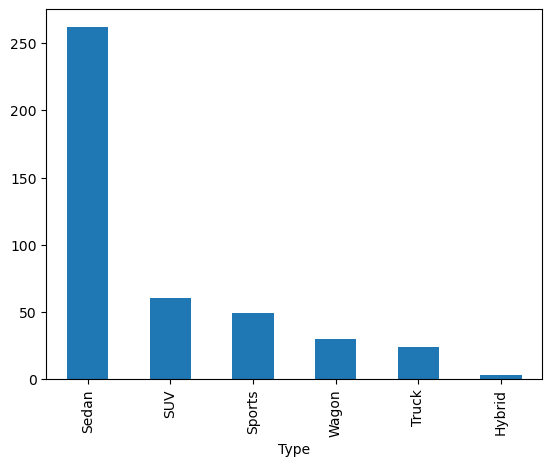

In [85]:
cars["Type"].value_counts().plot(kind="bar")

* What is the average engine size across all cars?
* What is the average number of cylinders in the cars?
* What is the average horsepower of the cars?
* What are the average MPG (miles per gallon) for city and highway driving?

In [86]:
np.mean(cars["EngineSize"])

3.1967289719626164

In [87]:
np.mean(cars["Cylinders"])

5.807511737089202

In [88]:
np.mean(cars["Horsepower"])

215.8855140186916

In [89]:
print(np.mean(cars["MPG_City"]))
print(np.mean(cars["MPG_Highway"]))

20.060747663551403
26.843457943925234


* How does the average MSRP differ between cars from different origins (Asia, USA, Europe)?
* How does the average invoice price vary among different drivetrain types (Front, Rear, All)?

In [90]:
cars.groupby("Origin")["MSRP"].mean()

Origin
Asia      24741.322785
Europe    48349.796748
USA       28377.442177
Name: MSRP, dtype: float64

In [91]:
cars.groupby("DriveTrain")["Invoice"].mean()

DriveTrain
All      33202.630435
Front    22834.070796
Rear     42101.363636
Name: Invoice, dtype: float64

* Which car type has the highest average horsepower?
* How do the average MPG city and highway values compare between different car types?

In [92]:
cars.groupby("Type")["Horsepower"].mean()

Type
Hybrid     92.000000
SUV       235.816667
Sedan     201.656489
Sports    284.163265
Truck     224.833333
Wagon     194.000000
Name: Horsepower, dtype: float64

In [93]:
cars.groupby("Type")["MPG_City"].mean()

Type
Hybrid    55.000000
SUV       16.100000
Sedan     21.083969
Sports    18.408163
Truck     16.500000
Wagon     21.100000
Name: MPG_City, dtype: float64

In [94]:
cars.groupby("Type")["MPG_Highway"].mean()

Type
Hybrid    56.000000
SUV       20.500000
Sedan     28.629771
Sports    25.489796
Truck     21.000000
Wagon     27.900000
Name: MPG_Highway, dtype: float64

* Is there a correlation between engine size and horsepower?
* Is there a correlation between the number of cylinders and MPG (both city and highway)?
* How does the weight of the car correlate with its horsepower?

<Axes: xlabel='EngineSize', ylabel='Horsepower'>

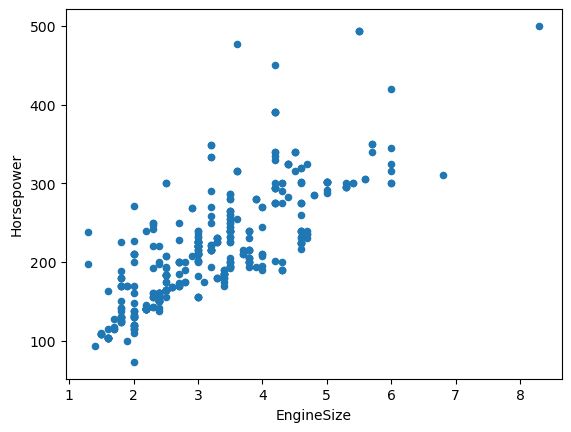

In [95]:
cars.plot(kind='scatter', x='EngineSize', y='Horsepower')

<Axes: xlabel='Cylinders', ylabel='MPG_City'>

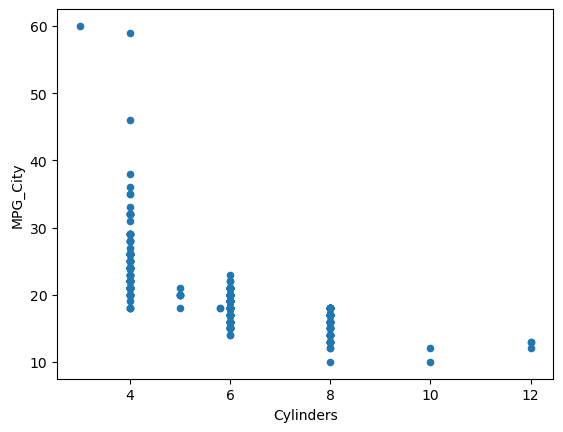

In [96]:
cars.plot(kind='scatter', x='Cylinders', y='MPG_City')

<Axes: xlabel='Weight'>

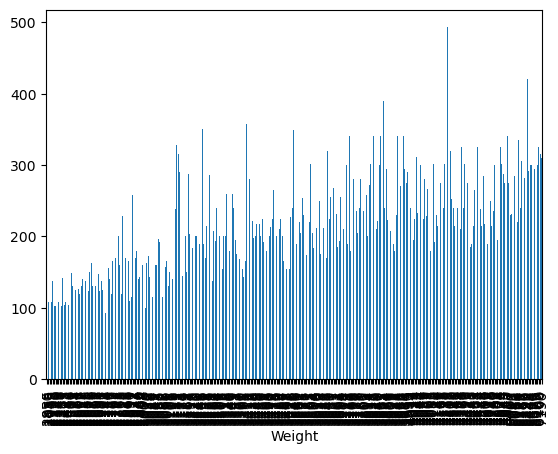

In [97]:
cars.groupby("Weight")["Horsepower"].mean().plot(kind='bar', x='Weight', y='Horsepower')

### 4. Recommendations

* Based on the data, which car would you recommend for a customer looking for a high-performance vehicle?
* Which car would you recommend for a customer prioritizing fuel efficiency?

> * sports cars
> * hyprid cars